In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

df = pd.read_csv('/Users/mariacristinaalvarez/Documents/PcalO2cal/LinearReg/HEALY2202_S20C22.csv')



: 

Calculate Practical Salinity (SP) and Conservative temperature (CT) for neutral density calcs (gamma_n)

In [245]:
import gsw
#Calculate Absolute Salinity, and potential density FOR winkler values 
df['SA g/kg'] =gsw.SA_from_SP(df['Sal00'], df['PrDM'], df['Longitude'], df['Latitude'])

df['in-situ Density'] = gsw.rho(df['Sal00'], df['Draw T'], df['PrDM'])
df['sigmaD'] = df['in-situ Density'] - 1000
##Aveaged file
mf = pd.read_csv('Northbound/HLY2202_022_Dec22O2calPcaldown1dbar.cnv', encoding="ISO-8859-1", delim_whitespace=True, skiprows=311, header=None)

#Up down cast 
up_down = pd.read_csv('Northbound/HLY2202_022_Dec22O2calPcal.cnv', encoding="ISO-8859-1", delim_whitespace=True, skiprows=301, header=None)

#Calculate Absolute salinity
mf['ST'] = gsw.SA_from_SP(mf[4], mf[0], mf[20], mf[19])
#Calculating conservative temperature from in-situ temperature
mf['CT'] = gsw.conversions.CT_from_t(mf['SA'],mf[2], mf[0])
#Calculate neutral density
mf['gamma_n'] = gsw.density.sigma0(mf['SA'], mf['CT'])


Text(0, 0.5, 'Pressure [dbar]')

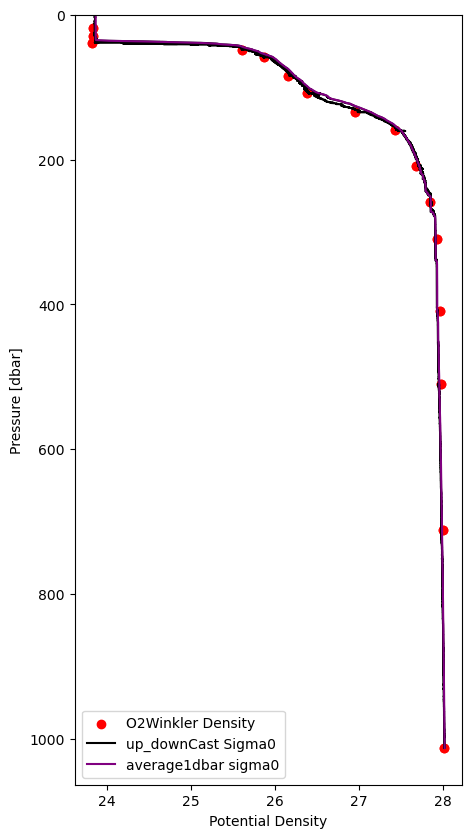

In [94]:
 
##Plotting all profiles in one figure
plt.figure(figsize=(5,10))
a = plt.scatter(df['WinklerDensity'], df['PrDM'],c='red', label='O2Winkler Density')
b = plt.plot(up_down[22], up_down[0],c='black', label='up_downCast Sigma0')
c = plt.plot(mf['potentialDensity'], mf[0],c='purple', label='average1dbar sigma0')
plt.gca().invert_yaxis()
plt.ylim(top=0)
#plt.xlim(left = 270,right=320 )
plt.legend(loc= 'lower left')


#c = plt.plot(mf['potentialDensity'], mf[0],c='purple')
plt.xlabel('Potential Density')
plt.ylabel('Pressure [dbar]')


In [183]:
df['WinklerDensity']

0     28.008786
1     28.008786
2     27.992215
3     27.992215
4     27.972083
5     27.972083
6     27.959017
7     27.959017
8     27.921107
9     27.921107
10    27.841506
11    27.841506
12    27.672003
13    27.672003
14    27.420302
15    27.420302
16    26.944596
17    26.944596
18    26.374351
19    26.374351
20    26.152454
21    26.152454
22    25.862467
23    25.862467
24    25.602621
25    25.602621
26    23.826838
27    23.826838
28    23.830252
29    23.830252
30    23.838368
31    23.838368
Name: WinklerDensity, dtype: float64

In [181]:
import scipy as sp
#df 

df['OxygenCTD'] = sp.interpolate.barycentric_interpolate(mf['potentialDensity'], mf[16], df['WinklerDensity'])

#plt.plot(mf[16], mf[0], 'o')
#plt.plot(o1,df['WinklerDensity'], c='red')
#plt.gca().invert_yaxis()

df['OxygenCTD'].max()


/Users/mariacristinaalvarez/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/mariacristinaalvarez/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/scipy/interpolate/_polyint.py:559: RuntimeWarning: overflow encountered in scalar divide
  self.wi[i] = 1.0 / np.prod(dist)
/Users/mariacristinaalvarez/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/scipy/interpolate/_polyint.py:559: RuntimeWarning: divide by zero encountered in scalar divide
  self.wi[i] = 1.0 / np.prod(dist)
/Users/mariacristinaalvarez/opt/anaconda3/envs/pygmt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nan

In [211]:
df.columns

Index(['Unnamed: 0', 'Station #', 'Cast', 'Depth(m)', 'Niskin', 'Bottle',
       'Draw T', 'Date', 'Sal00', 'Sal11', 'Sigma-t00', 'Sigma-t11', 'PrDM',
       'DepSM', 'T090C', 'T190C', 'C0S/m', 'C1S/m', 'FlECO-AFL', 'Sbox0Mm/Kg',
       'Par', 'AltM', 'Latitude', 'Longitude', 'Winkler umol/kg', 'CalcSigma',
       'WinklerDensity', 'SA g/kg', 'in-situ Density', 'sigmaD', 'OxygenCTD'],
      dtype='object')

(24.0, 28.2178831795)

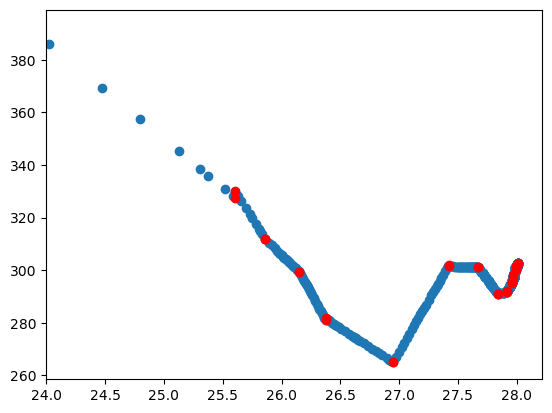

In [253]:
df.drop_duplicates(subset='Winkler umol/kg', keep="first", inplace=True)
interpolated_1 = sp.interpolate.interp1d(df['WinklerDensity'], df['Winkler umol/kg'], kind='linear',fill_value='extrapolate')
new_y1 = interpolated_1(mf['potentialDensity'])
new_y1

plt.scatter(mf['potentialDensity'],new_y1, zorder=1)
plt.scatter(df['WinklerDensity'],df['Winkler umol/kg'],c='red',  zorder =1)
plt.xlim(left=24)
#plt.plot(mf[16], new_y1)
#plt.gca().invert_yaxis()

In [254]:
interpolated_1

In [261]:
# Creating numpy arrays to find matches between potential densities in the two arrays. 

ctd = np.column_stack(([mf['potentialDensity'],new_y1]))

bottle = np.column_stack([df['WinklerDensity'], df['Winkler umol/kg']])

array([[ 23.86565974, 391.6169839 ],
       [ 23.86622069, 391.59629747],
       [ 23.86572534, 391.61456498],
       ...,
       [ 28.0163608 ,          nan],
       [ 28.0164451 ,          nan],
       [ 28.01634577,          nan]])

In [140]:
df.sort_values(by='PrDM', ascending=True)
mf.sort_values(by='PrDM', ascending=True)
mf.rename(columns={0:'PrDM'})
merged_sigma = pd.merge_asof(df, mf,  on = 'PrDM', left_by='WinklerDensity', right_by='potentialDensity', direction='nearest')

ValueError: left keys must be sorted